# Load the Data

In [1]:
import pandas as pd

df = pd.read_csv("./datasets/geez_numbers.csv")

In [2]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,150,153,151,153,153,157,155,156,156,157,...,145,150,150,147,150,152,152,156,156,0
1,168,167,164,167,171,172,168,172,174,171,...,159,153,158,157,155,161,160,164,167,0
2,157,164,162,157,161,160,164,164,163,163,...,135,142,143,140,142,143,146,148,151,0
3,150,154,152,152,155,153,156,156,153,150,...,116,128,130,128,129,131,133,135,137,0
4,157,155,155,157,161,156,155,158,157,158,...,126,127,127,130,131,132,128,136,139,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,146,149,145,147,146,148,148,150,146,143,...,146,149,149,155,153,160,159,164,169,9
210,156,160,155,159,159,157,159,164,162,163,...,155,157,161,161,160,168,169,177,182,9
211,217,214,213,213,217,219,212,217,214,213,...,210,215,211,217,220,221,221,228,234,9
212,200,202,202,202,201,204,201,204,204,204,...,204,209,208,208,213,213,216,223,222,9


In [11]:
df["784"].value_counts()

1    26
6    26
2    25
3    25
5    25
4    21
7    19
9    17
0    16
8    14
Name: 784, dtype: int64

# Visualize the Data

<AxesSubplot:>

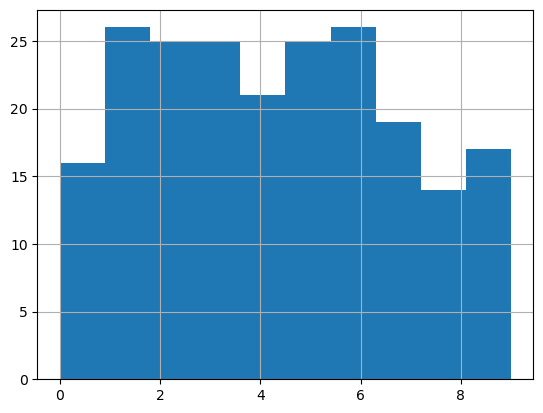

In [5]:
df["784"].hist()

# Stratified Shuffling

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
splited = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splited.split(df, df["784"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
    


In [16]:
train_set.shape

(171, 785)

In [65]:
test_set.shape

(43, 785)

<AxesSubplot:>

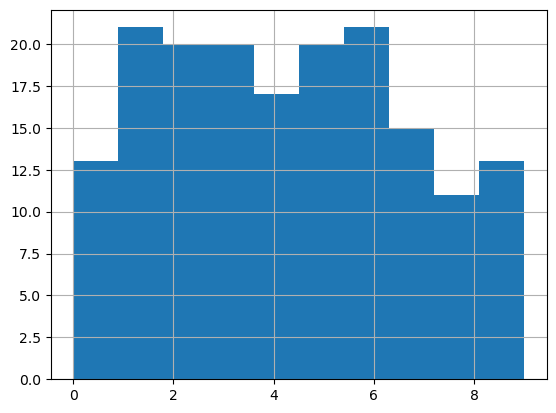

In [18]:
train_set["784"].hist()

<AxesSubplot:>

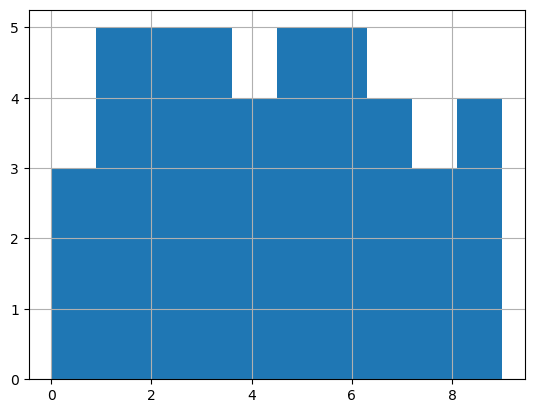

In [19]:
test_set["784"].hist()

In [23]:
X_train, y_train, X_test, y_test = train_set.loc[:, train_set.columns != "784"], train_set["784"], test_set.loc[:, test_set.columns != "784"], test_set["784"]


# Training a Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=500, max_leaf_nodes=100, n_jobs=-1)
forest_clf.fit(X_train.values, y_train.values)

RandomForestClassifier(max_leaf_nodes=100, n_estimators=500, n_jobs=-1,
                       random_state=42)

true value 163    6
Name: 784, dtype: int64
predicted value [6]


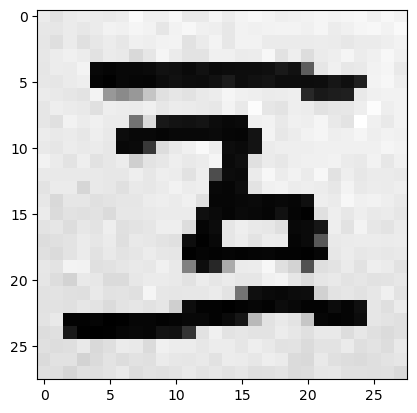

In [27]:
import random
import matplotlib.pyplot as plt
import numpy as np

index = random.randint(0, 183)
some_digit = np.array(X_train.iloc[[index]])
print("true value", y_train.iloc[[index]])
print("predicted value", forest_clf.predict(some_digit))
plt.imshow(some_digit[0].reshape(28, 28), cmap="gray")

# Feature Importance

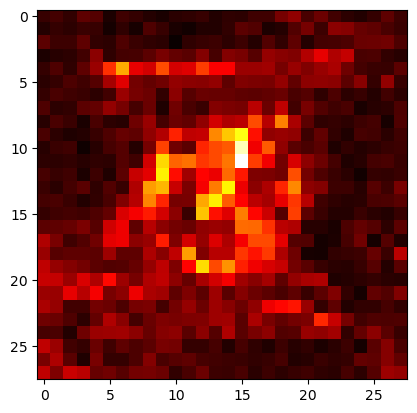

In [28]:
plt.imshow(forest_clf.feature_importances_.reshape(28, 28), cmap="hot")

# Measuring Performance

## confusion matrix

In [29]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
print(y_train_pred)

[3 6 3 1 4 6 2 3 0 2 4 2 2 7 6 2 2 4 4 6 1 3 2 3 7 1 3 0 4 5 5 8 2 1 6 3 2
 5 1 2 5 6 4 7 0 1 1 4 1 0 2 0 0 1 3 0 8 3 1 4 7 1 1 3 1 4 8 4 6 1 2 3 5 5
 1 3 5 0 5 2 1 2 4 0 2 3 3 5 2 9 3 6 2 6 1 4 5 7 2 3 5 6 9 0 8 1 5 4 6 1 6
 5 0 4 2 6 0 2 0 0 9 4 6 6 8 6 1 7 0 5 4 0 9 5 2 2 6 1 5 4 1 5 3 6 5 7 1 5
 6 3 5 2 1 4 3 2 1 7 7 6 3 2 9 0 2 3 1 5 6 6 6]


In [30]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)

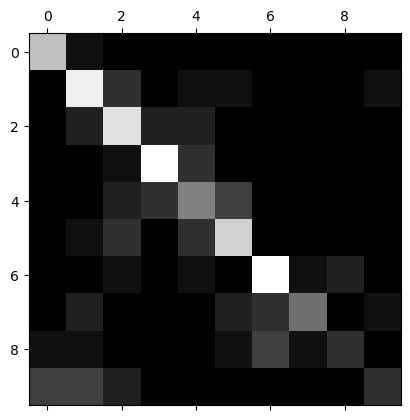

In [35]:
plt.matshow(conf_mx, cmap="gray")

## Grid Search

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [100, 150, 200, 250], 'max_leaf_nodes': [8, 16, 32, 64]}]
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_leaf_nodes': [8, 16, 32, 64],
                          'n_estimators': [100, 150, 200, 250]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'max_leaf_nodes': 32, 'n_estimators': 100}

In [41]:
import joblib
forest_clf = grid_search.best_estimator_
joblib.dump(forest_clf, "forest_clf.joblib")

['forest_clf.joblib']

# Validating on the Test Set

In [42]:
y_pred = forest_clf.predict(X_test)

In [43]:
conf_mx = confusion_matrix(y_pred, y_test)

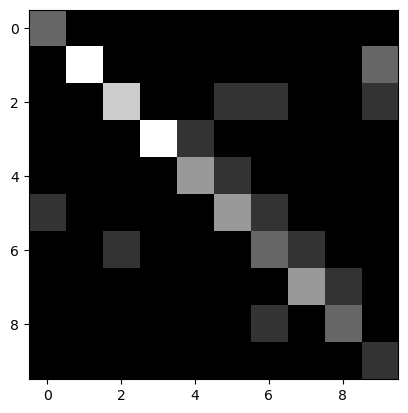

In [44]:
plt.imshow(conf_mx, cmap = "gray")

# ROC Curve

In [47]:
pred_prob = forest_clf.predict_proba(X_test)
pred_prob

array([[2.00000000e-02, 2.50000000e-03, 2.65000000e-02, 2.00000000e-02,
        4.29166667e-02, 1.05833333e-01, 2.26583333e-01, 4.37416667e-01,
        8.54166667e-02, 3.28333333e-02],
       [4.76190476e-04, 1.56880952e-01, 9.20168067e-02, 0.00000000e+00,
        4.84166667e-02, 4.00000000e-02, 3.40161765e-01, 7.17261905e-02,
        2.19154762e-01, 3.11666667e-02],
       [2.33333333e-02, 6.66666667e-03, 2.97777778e-02, 1.50000000e-02,
        5.11111111e-02, 2.37833333e-01, 2.00119048e-01, 2.70542717e-01,
        1.45782680e-01, 1.98333333e-02],
       [2.33333333e-02, 2.64285714e-02, 1.41111111e-01, 1.71664502e-01,
        4.01293651e-01, 8.06349206e-02, 8.60119048e-02, 9.86111111e-03,
        1.90656566e-02, 4.05952381e-02],
       [2.75000000e-01, 2.22868937e-01, 1.60673346e-01, 2.41025641e-02,
        9.40263158e-02, 6.00000000e-02, 3.70000000e-02, 4.81145511e-02,
        2.40476190e-02, 5.41666667e-02],
       [1.61111111e-02, 7.28104575e-02, 5.10840013e-01, 5.66025641e-02,
   

In [48]:
pred_prob.shape

(43, 10)

In [49]:
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test,classes=np.unique(y_test))

In [50]:
y_bin.shape

(43, 10)

In [52]:
pred_prob.shape

(43, 10)

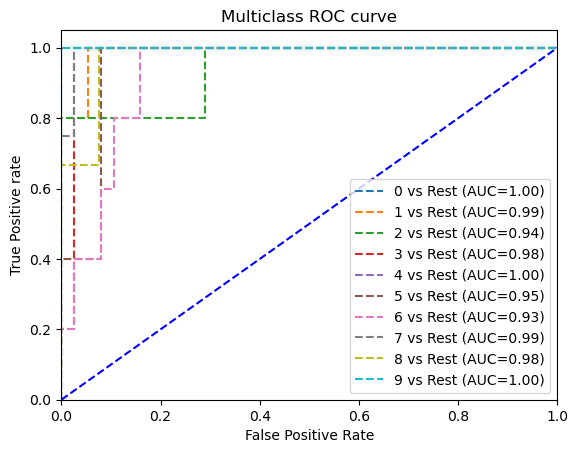

In [53]:
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 10
classes = [i for i in range(11)]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()